# Creating an efficient, scalable and generalizable machine learning pipeline for the prediction of molecular energies using simple atomic, and structural features.






## Project proposal

*Word count:1250*

### **1.0 Introduction and Motivations**


Molecules, or more specifically molecular properties are the main ingredients that underpin the chemical, and pharmaceutical industries. Billions of pounds are spent every year in the process of chemical, and drug discovery, but it is a resource-heavy, and often luck based procedure.$^{[1]}$ Over the past several decades suffisticated quantum chemical methods have been produced to very accurately calculate a number of chemical features that can be used for finding drugs with particular features of interest, such as important electronic properties like polorizabilites, or orbital energies.$^{[2]}$ The issue that has been plaguing the aforementioned industries however, is the cost of these procedures. When you consider the fact that compound chemical space is predicted to contain upwards of $1\times 10^{60}$ compunds with the potential of drug-like properties, its easy to understand why complex calculations may not be the most efficent way to explore it.$^{[3,4]}$ Of course, this has been long-known and the idea that the complexity of cutting-edge quantum methods have far-outgrown the imporvements in computing power is well understood.$^{[5]}$ For this reason, creating machine learning and AI driven models that can match, or get close to the accuracy of formal quantum calculations, but without the heavy resource cost has been an area of research for some time. Here, we aim to introduce a general machine learning framework that is highly-scalable, and capable of predicting molecular energies in a time-efficent manner.$^{[6-8]}$ We will try to capture the importance of molecular structure and composition in our model, in the hopes that a simple, cheap, yet highly generalizable model can be produced.


### **2.0 Aims and objectives**

As previously mentioned, a big issue in the world of pharmaceuticals, and more generally physical chemistry is the huge resource costs associated with calculating molecular properties. The most accurate quantum chemical techniques can take several hours to run on a handful of molecules, which of course in the world of pharma is insignificant, especially when it is considered that lots of pharmacophores(features needed to understand the interactions between a molecule and a target) may be needed to properly understand the potential of a given molecule. Here, we aim to create a robust, and scalable ML pipe-line for the accurate predication of molecular energies using nothing more than a combination of high-level chemical features such as; average atomic distances, SPE energies, atom-type counts etc. 


**Overall goal:**
* *we aim to create a scalable, distributed machine learning-based approach that can produce molecular-energy predictions, that are both accurate, and efficent.*

To achieve this goal, there are 3 aims that must be met.

**1)** We must create an efficent workflow for the storage and exploration of molecular data.
* This will involve storing data in a distributed manner, here we choose to store it in HDFS.
* We must make use of in-memory storage for dataframes that will be transformed multiple times
* We will make use of Spark's efficent implentation of SQL for data exploration and feature engineering.

**2)** We must devise a number of features that encorperate atomic and molecular information
* We will incorperate atomic information from the perodic table, and other external resources to ensure the features that are made hold sufficent information
* We will look to the literature for other features to be used. The main one being Coloumb matrices.

**3)** Due to the size of chemical space, we must ensure our model is robust, and generalizable. 
* We must spend ample time validating and optimising our final model, to ensure it generalises well to un-seen data.
* In general, we should also prioritise algorithims that are fast to train where possible.


### **3.0 Data**

For this project we have chosen to use a dataset found on kaggle (https://www.kaggle.com/datasets/burakhmmtgl/predict-molecular-properties?select=pubChem_p_00225001_00250000.json). The data is split into a number of .JSON files, the total size of the dataset is 1.2GB. The molecular data provided is from pubchem. Which is the most well established, and used publically-avaiable chemical repository in the world. As such, the quality of the data is expected to be very high. Some steps will be taken to validate this assumption nonetheless. Pubchem has data on 10 million + chemically stable molecules and a user friendly API. as such, aquring more data for our project would be easy if needed.

As can be seen in the below schema, we have very few independant variables. We have data on Atom type, Atom location in cartesian space, and a number of shape multiple terms. We will also supliment our data with SPE calculated from pseudopotentials using the quantum-espresso website (https://www.quantum-espresso.org/pseudopotentials/). 

***Raw data structure***


    root
     |-- En: double (nullable = true)
     |-- atoms: array (nullable = true)
     |    |-- element: struct (containsNull = true)
     |    |    |-- type: string (nullable = true)
     |    |    |-- xyz: array (nullable = true)
     |    |    |    |-- element: double (containsNull = true)
     |-- id: long (nullable = true)
     |-- shapeM: array (nullable = true)
     |    |-- element: double (containsNull = true)


**Full dataset (1.2GB)**: 
* data storage location on lena FS: .user/cthic001/bigdata/cw2prep/data/molecular_data_sample 
* data storage location on HDFS: .cw2/molecular_data_sample 


**Subsample dataset (115MB)**:
* data storage location on lena FS: .user/cthic001/bigdata/cw2prep/data/molecular_data_subsample
* data storage location on HDFS: .cw2/molecular_data_subsample



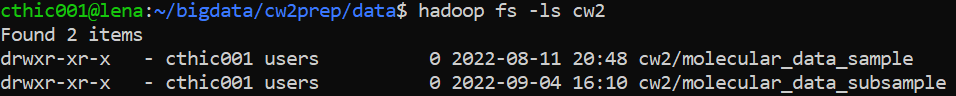


### **4.0 Work plan**

1) **Step 1: efficently storing, and exploring the data.**
* An Important factor in this project is ensuring scalability, as such it is important to keep in mind how we will be storing the data. Here we choose to copy it from our local file system onto Lena's filesystem using the command promt, which bypasses the need for a GUI, which greatly increases copying time. We then transfer it to the **HDFS** where the .JSON files containing the molecular data can be efficently distributed ready for parraleization. 

* Since the data is stored in .JSON files there is a hierachy of elements that must be explored and un-raveled ready for analysis. The first major step when the data is imported will be just that. with **spark SQL**, along with the partining of data  this should be a cheap-process, and well scalable. 


2) **Step 2: Feature engineering**

* When the data has been loaded and explored, we will aim to produce a number of features that can be used to create a predictive model. We will start by producing simple features, such as atom-type counts, molecular masses, and SPE calculations. If these do not provide the model with sufficent complexity to understand the relationship between molecular structure and molecular energy, we will look to the literature to intrdouce more complex representations of the molecule, such as Coulomb matrices.

* In this step we will also begin building some cheap ML pipelines using **MLlib** to get an understanding of feature importance.

3) **Step 3: Final Model optimisation and validation**

* When we have chosen our features, we will make use of hyperopt, a hyper-optimisation package that is well established in python, but works just aswell in spark. It implements a number of algorithim for parameter selection that cuts down on the run-time compared to using a simple grid-search like method. In hyperopt, we will define a feature space to search through, aswell as a validation process to follow for each permutation, this will ensure the best parameters are chosen, and the model output will be adequetly robust. 

The workplan revolves around the steps introduced above, it is our hope that this work will take one month to complete, although we anticipate finishing several days ahead of the deadline, this ensures if anything goes wrong we will have ample to fix any issues.


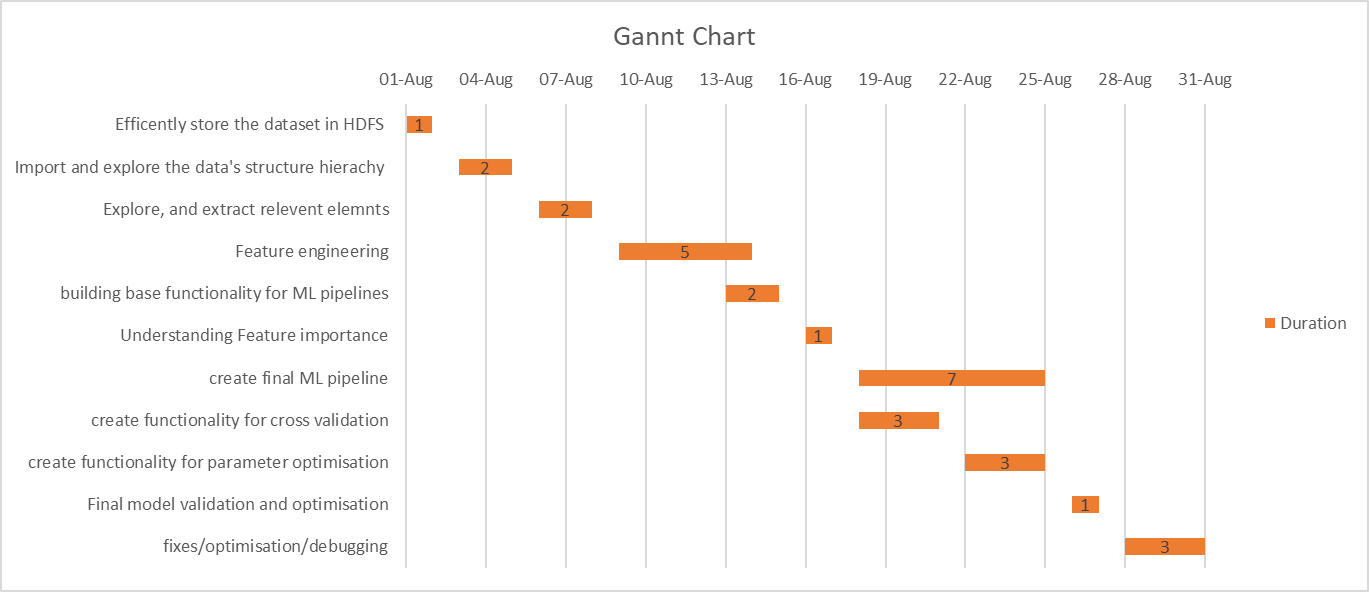





## Summary	and	Conclusions


*Word count: 520*

Overall, we succesfully created a distributed, spark based framework for the prediction of molecular energies using nothing more than simple, atomic structure features. We introduced a number of user defined functions for feature engineering purposes, created a robust function for model evalulations, and succesfully implemented a hyperopt workflow for model validation and parameter optimisation. On top of this, we kept scalability in mind by ensuring the efficent use of Hadoop's distributed storage system, HDFS, and in-memory storage. spark SQL was successfully used for feature engineering, and data-structure exploration Unfortunatly, despite succesfully creating a function that outputs a flattened Coloumb matrix, we were unable to use these features for modeling, despite having spent signifcant time on trying to resolve this issue. Despite this, we were able to produce a model with a rmse of $15.80$. It was found that MLlib's GBT algorithim performed better than their implementation of a random forest. Intuitively this makes sense, ensabmle methods typically outperform simple randomforest models. However, it was discovered the training times for GBT were up to 5x higher for GBT vs the randomforest. 

#### Summary of the our aims

* **Aim 1: We must create an efficent workflow for the storage and exploration of molecular data.**

We succesfuly completed our first objective, by utalsing HDFS we were able to store our molecular data in a distributed fashion, ensuring scalability for future projects that may require signifcantly larger datasets. We also ensured a sufficent number of partitions were used throughout this project (10), meaning we were utalising the power of parallelized computing throughout the project. Ontop of this, dataframes that were being worked on itterivly were stored in memory using the .cache() method, again reducing the run-time of the overall workflow. 

* **Aim 2: We must devise a number of features that encorperate atomic and molecular information.**

Here we used spark SQL to generate a number of features that were succesfully used to capture atomic information of the molecule, in particular atom count features performed very well. Unfortunatly, we were unable to incorperate the couloumb matrix features we mentioned in our workflow. This feature has been shown in the literature to generate excelent results, as such our model certainitly suffered from its absence. With that in mind, we did succesfully create a UDF for the implementation of these matrices which is a good starting point for a future project if we wish to come back and resolve this issue.

* **Aim 3: Due to the size of chemical space, we must ensure our model is robust, and generalizable.** 
    
We succesfully implemented a validation, and optimisation framework using the hyperopt package that uses an efficent, distributed Bayesian optimzation algorithim for parameter selection. This is of particular importance for the scalability of this project. The function we intrdouce requires signifcantly less itterations than a grid-search type optimzation method to find optimzed parameters., rather than searching every possible combination in parameter space, the algorithim optimises its assumptions about the model to choose better and better parameters. Overall, this means the speed of the algorithim is similar to that of a random-selection model but with signifcantly better predictions. 



In [1]:
import pyspark
from datetime import datetime
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
from pyspark.sql.types import ArrayType, StringType, StructType, StructField, FloatType, IntegerType
from pyspark.ml.linalg import DenseVector, VectorUDT, SparseVector, Vectors
from pyspark.ml import Pipeline
import pyspark.sql.functions as sf
import pandas as pd
from pyspark.sql.functions import col,isnan, when, count, udf, size, explode, array
from pyspark.ml.functions import vector_to_array
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor, GBTRegressor
from pyspark.mllib.tree import GradientBoostedTrees
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit
from pyspark.sql.functions import udf


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import logging
import hyperopt
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

%matplotlib inline


In [2]:
# I think this just setes the name and stuff for when we look on sparks web Ui
conf = SparkConf().setAppName('CW2Project') 
# initalises a SparkContext object which is obviously needed for anything spark related.
# note: if we were creating this program directly in the command line we wouldnt need to define a sparkcontext.
sc = pyspark.SparkContext(appName="CW2Project", conf=conf)
# intitalising SQLContext which allows us to make use of SQL. note: this step just basically saves us have to specify
#SQLContext.... everytime we want to use sql.

sq = SQLContext(sc)



In [3]:
df = (sq.read.json("cw2/molecular_data_sample/", multiLine=True))

print(f"Number of partitions: {df.rdd.getNumPartitions()}")
print(f"Number of molecules in the dataset: {df.count()}")

Number of partitions: 10
Number of molecules in the dataset: 171137


In [4]:
# atomic data usd to supplement our dataset. simply copied from the periodic table.
atomoic_valences = {'H': 1, 'C': 4, 'N': 5, 'O': 6,"F":7,"Si":4,'P': 5, 'S': 6,"Cl":7,"Br":7,"I":7}
atomic_masses = {'H': 1.0, 'C': 12.0, 'N': 14.0, 'O': 15.999,"F":19.0,"Si":28.1 ,'P': 30.97, 'S': 32.06,"Cl":35.45,"Br":79.9,"I":127.90 }
atomic_Z = {'H': 1, 'C': 6, 'N': 7, 'O': 8,"F":9,"Si":14,'P': 15, 'S': 16,"Cl":17,"Br":35,"I":53}

# SPE energies calculated using quantum-espresso. more details are in the data section of the proposal.
singleAtomEnergies = {'H': -0.917798, 'C': -11.275352, 'N': -19.577858, 'O': -33.171237,"F":-48.419952 ,"Si": -9.82168,'P': -15.12336, 'S': -22.522057,"Cl":-34.47286,"Br":-29.70420,"I":-33.242051}

In [6]:
# creata a temp view of our dataframe so we can use spark SQL on it.
df.createOrReplaceTempView("raw_data")

# Quick query to see the structure of our data in its raw form. Easier to visualise than just looking at the schema. 
query_vis = """

SELECT
    *
    
FROM
    raw_data

ORDER BY
id
"""

sq.sql(query_vis).show()

+--------+--------------------+---+--------------------+
|      En|               atoms| id|              shapeM|
+--------+--------------------+---+--------------------+
|  37.801|[[O, [0.3387, 0.9...|  1|[259.66, 4.28, 3....|
| 44.1107|[[O, [-0.3716, -0...|  2|[259.66, 4.36, 2....|
| 19.4085|[[O, [-0.0782, -1...|  3|[202.9, 3.34, 1.7...|
| -0.1086|[[O, [1.5903, -0....|  4|[92.05, 1.98, 1.2...|
|-23.8799|[[P, [-2.2394, -0...|  5|[175.32, 6.18, 1....|
| 47.5806|[[Cl, [-2.7807, -...|  6|[235.96, 4.84, 2....|
| 18.5631|[[N, [-1.4729, 0....|  7|[222.05, 4.25, 1....|
| 14.4794|[[O, [0.9144, -0....|  8|[182.32, 3.11, 1....|
| 10.6813|[[P, [-2.873, 0.2...|  9|[280.3, 5.36, 2.1...|
|103.0444|[[O, [-0.5676, 1....| 10|[623.75, 12.51, 5...|
|  0.3519|[[Cl, [1.6464, -0...| 11|[86.06, 2.27, 1.1...|
| 21.7083|[[O, [2.4848, 0.0...| 12|[182.32, 2.71, 2....|
|  17.178|[[Cl, [1.8358, -2...| 13|[190.83, 3.87, 1....|
| 23.5335|[[O, [-5.1299, 1....| 14|[485.14, 12.77, 4...|
|  8.9488|[[O, [2.5311, 1.0...|

### Exploring the data's hierachy

As could be seen in the schema presented in the data section of the proposal, we have a number of features nested within other features, the first step in exploring our data is extracting these nested features. The below SQL query does just that. We explode atoms.type to get the atom types, from that we create a selection of features that can be used for modeling. 



### Making use of .Cache() and stored memory

Throughout the project we will make use of the .cache() method to store dataframes we plan on using in memory, this means when we call a transformer on that given dataframe, it does not need to read it from the file system, intead it can just call it directly from memory. This should greatly increase run times, especially if we plan on calling a dataframe multiple times, or use itterative machine learning algorithims.

note: In general using cache on everything is a bad idea and memory issues can very quickly occur. Here, we makesure to .unpersist() any dataframes we wont be using to ensure objects are not being stored in memory for no reason.

In [7]:


query = """

SELECT id AS id,
       MAX(en) AS Energy,
       MAX(atoms.type) AS Atoms,
       MAX(atoms.xyz) AS Atom_Coords,
       MAX(shapeM) AS ShapeM,
       COUNT(atoms_exploded) as Atom_Count,
       
       SUM((CASE
           WHEN atoms_exploded in ("C","N","O","P","S","Cl","Fl","Br","Si","I") THEN 1
           ELSE 0 
       END)) AS Heavy_Atom_Count,
       
       SUM((CASE
           WHEN atoms_exploded = "H" THEN 1
           WHEN atoms_exploded = "C" THEN 12
           WHEN atoms_exploded = "N" THEN 14
           WHEN atoms_exploded = "O" then 15.99
           WHEN atoms_exploded = "P" then 30.97
           WHEN atoms_exploded = "S" then 32.06
           WHEN atoms_Exploded = "Si" then 28.1
           When atoms_Exploded = "F" then 19.0
           WHEN atoms_Exploded = "Cl" then 35.45
           When atoms_Exploded = "Br" then 79.9
           WHEN atoms_Exploded = "I" then 127.90
           END)) AS Molecular_Mass,
           
        SUM((CASE
            WHEN atoms_exploded in ("O","N","F") THEN 1
            ELSE 0
        
        END)) AS potential_Hbond_donors,
        
            SUM((CASE
                WHEN atoms_exploded in ("F","Cl","Br","I") THEN 1
                else 0 
            END)) AS Number_Halides
       
       
FROM 
    (SELECT
        *,
        explode(atoms.type) atoms_exploded
        
    FROM
        raw_data) 


GROUP BY
    id
ORDER BY
    id

"""

# limitations, but for now it works and speed things up ten-fold.
feature_engineer1 = sq.sql(query).cache()
feature_engineer1.show()



+---+--------+--------------------+--------------------+--------------------+----------+----------------+--------------+----------------------+--------------+
| id|  Energy|               Atoms|         Atom_Coords|              ShapeM|Atom_Count|Heavy_Atom_Count|Molecular_Mass|potential_Hbond_donors|Number_Halides|
+---+--------+--------------------+--------------------+--------------------+----------+----------------+--------------+----------------------+--------------+
|  1|  37.801|[O, O, O, O, N, C...|[[0.3387, 0.9262,...|[259.66, 4.28, 3....|        31|              14|        202.96|                     5|             0|
|  2| 44.1107|[O, O, O, O, N, C...|[[-0.3716, -0.903...|[259.66, 4.36, 2....|        32|              14|        203.96|                     5|             0|
|  3| 19.4085|[O, O, O, O, C, C...|[[-0.0782, -1.565...|[202.9, 3.34, 1.7...|        19|              11|        155.96|                     4|             0|
|  4| -0.1086|[O, N, C, C, C, H...|[[1.5903, -

## initial ML pipeline

Now we have a collection of inital features, we will build a very quick and simple random forest to see how these features perform, and get an idea of feature importance.



In [8]:
# create a train/test split. For our final model we will include a validation set too. For now we are just trying 
# to get a rough idea of how effective our features are.

def MLPipeline(Estimater, data, non_feature_variables = ["id","Energy","Atoms","Atom_Coords","ShapeM"],seed=None):
    '''Creates a generic machine learning pipeline that takes any distributed estimater, and non-vectorized spark-dataframe
    and outputs a trained model, dependant variable predictions, and feature names.
    
    params
    ------
    
    Estimater:
        Any Estimater object in MLlib. i.e any estimater that requires a label, and feature column.
    
    data:
        A non-vectorized spark dataframe containing the dependant, and independant variables.
        
    non_feature_variables:
        optional list-like object that contains non-feature variable names. This should at the very least contain the name
        of the label column. It can also be used to remove any features that you do not want to use to train the model.
        
    seed:
        An integer used to set the seed of the test/train split for reproducability.
        
    return
    ------
    
    model:
        The pipeline that contains the trained model.
        
    model_pred:
        A list containing predicted dependant variable values.
    
    feature_cols:
        A list containing names of the features used for training. I.e all columns that are not 1) the label column, 
        or columns found in non_feature_variables.

    
    '''
    

    test,train = data.randomSplit([0.3,0.7],seed)
    

    # get a list of all column names
    col_names = data.columns

    
    #independant variables to be used for training our initial model
    feature_cols = [x for x in col_names if x not in non_feature_variables]

    # Create a vector that contains all feature columns.
    colsToVecColFeatures = VectorAssembler(inputCols = feature_cols, outputCol = "features")
    
    # pipeline that combines our vectorassembler and randfomforset object.
    estimater_pipeline = Pipeline(stages=[colsToVecColFeatures,Estimater])
    
    model = estimater_pipeline.fit(train)
    
    model_pred = model.transform(test)
    
    return model, model_pred, feature_cols


In [9]:
# instantiate our RandomForest object.
RF1 = RandomForestRegressor(featuresCol="features",labelCol="Energy", predictionCol="Predicted_Energy",seed=104,
                           numTrees=50)
# call our MLpipeline function
RF1_model, RF1_predictions, feature_cols = MLPipeline(RF1,feature_engineer1,seed=123)

In [10]:

feature_importance = RF1_model.stages[-1].featureImportances

def feature_importance_vis(feature_names,feature_importance):
    '''A helper function for model_summary that creates a simple bar-chart to visualise feature importance.
    
    params
    ------
    
    feature_names:
        A list containing the names of features, which will be used to label the graph. The order of names should 
        corraspond to the order of feature_importance
    
     feature_importance:
        A list of numeric-elements that contain the importance of each feature. They can be extracted from the model 
        outputed from MLPipline. i.e model.stages[-1].feature_importances
    
    '''
    
    feature_dic = {x:y for x,y in zip(feature_names,feature_importance)}
    
    feature_dic_sorted = sorted(feature_dic.items(), key=lambda x: x[1],reverse=False)
    
    names_sorted = [x[0] for x in feature_dic_sorted]
    importance_sorted = [x[1] for x in feature_dic_sorted]
    
    
    x_coords = [x for x in range(1,len(feature_names)+1)]
    
    fig, ax1 = plt.subplots(figsize=(8,8))
    
    ax1.set_title("Feature importance - gini")
    ax1.barh(x_coords, importance_sorted,height=0.3)
    ax1.set_ylabel("Feature names")
    ax1.set_xlabel("Feature importance")
    ax1.set_yticks(ticks=x_coords, labels=names_sorted)
    
    plt.show()
    

In [25]:
def model_summary(model,predictions,feature_cols,feature_importance):
    '''A function that produces a summary report for regression model performance, including RMSE, feature importances,
    and parameter selections.
    
    params
    ------
    model:
        The estimater to be evaluated
    
    predictions:
        The output from model, i.e the predictions of the dependent variable. This could be found by using 
        the MLPipeline function.
    
    feature_cols:
        A list containing the names of the featuers. This is simply for the purpose of labeling the graph correctly.
        This can be found by using the MLPipeline function.
    
    feature_importance:
        A list of numeric-elements that contain the importance of each feature. They can be extracted from the model 
        outputed from MLPipline. i.e model.stages[-1].feature_importances
    
    '''
    model_eval = RegressionEvaluator(predictionCol="Predicted_Energy",labelCol="Energy",metricName="rmse")
    model_rmse = model_eval.evaluate(predictions)
    
    
    params = ({param[0].name: param[1] for param in model.stages[-1].extractParamMap().items()})
    
    print(f"-----------------------------------\n{model} Summary\n-----------------------------------\n")
        
    #print RMSE value
    print(f"RMSE score: {round(model_rmse,4)}\n-----------------------------------")
    
    # print feature importance graph
    feature_importance_vis(feature_cols,feature_importance)
    
    # print a list of parameters and their values for the model
    print("-----------------------------------\nParam name / param value\n-----------------------------------")
    for param in params.items():
        print(f"{param[0]}: {param[1]}")

-----------------------------------
PipelineModel_69cf9f22de16 Summary
-----------------------------------

RMSE score: 19.8044
-----------------------------------


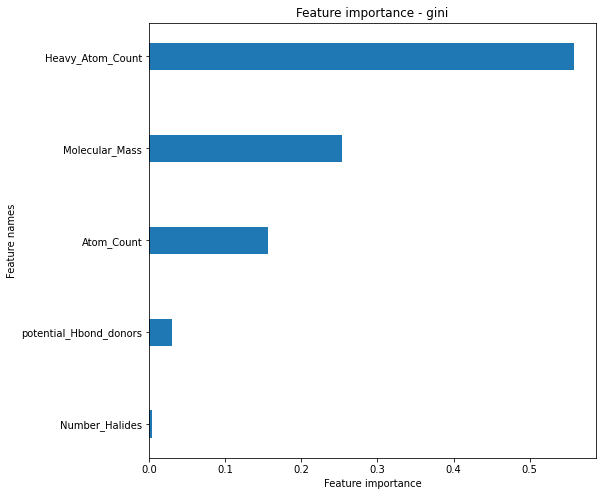

-----------------------------------
Param name / param value
-----------------------------------
bootstrap: True
cacheNodeIds: False
checkpointInterval: 10
featureSubsetStrategy: auto
featuresCol: features
impurity: variance
labelCol: Energy
leafCol: 
maxBins: 32
maxDepth: 5
maxMemoryInMB: 256
minInfoGain: 0.0
minInstancesPerNode: 1
minWeightFractionPerNode: 0.0
numTrees: 50
predictionCol: Predicted_Energy
seed: 104
subsamplingRate: 1.0


In [12]:
model_summary(RF1_model,RF1_predictions,feature_cols,feature_importance)

### clearly this model isnt great. lets try and use the coordinate data to get some more features.

In [13]:
@udf
def avg_distance(coords,atoms):
    '''This UDF function takes each atomic coordinate observations and calculates the average distance between all HEAVY atoms in 
    a given molecule.
    
    '''
    avg_distances =[]
    for ind, i in enumerate(coords):
        if atoms[ind]!= "H":
            x1=i[0]
            y1=i[1]
            z1=i[2]
            distances = []
        else:
            continue
        for ind2, j in enumerate(coords):
            #logic so it doesnt calculate distance with its self
            if ind==ind2:
                continue
            if atoms[ind2]!="H":
                x2=j[0]
                y2=j[1]
                z2=j[2]
                dist= math.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)
                distances.append(dist)
            else:
                continue
        try:
            avg_dist = sum(distances)/len(distances)
        except:
            avg_dist = 0
        avg_distances.append((avg_dist))
    
    avg_dist_between_all_atoms = sum(avg_distances)/len(avg_distances)
    return ((avg_dist_between_all_atoms))



@udf
def sum_SPE(Atoms):
    '''Calculated a sum of the Single point energies for all atoms in a given molecule.
    '''
    global singleAtomEnergies
    
    SPE = sum([singleAtomEnergies.get(item,item)  for item in Atoms])
    return SPE

# multipole shape values; similar structures should have similar multipole shapes. the first term contains the majority
# of the information with each term after having less and less value. here we just use the first term.
@udf
def first_MP_terms(ShapeM):
    '''extracts the first, and most imapctful feature found in the shapeM array.
    '''
    MP_term = ShapeM[0]
    return MP_term


# we will no longer use feature_engineer1 so we will un-cache it so we are not unnecessarily taking up memory
feature_engineer1.unpersist()
# Create our new feature DF with avg atom distance, and cache it for speed.
feature_engineer2 = feature_engineer1.select("*",(avg_distance("Atom_Coords","Atoms")).alias("avg_distance").cast('double')
                                             ,sum_SPE("Atoms").alias("SPE").cast("double"),
                                             first_MP_terms("ShapeM").alias("first_MP_Term").cast("double")).cache()

feature_engineer2.show()

+---+--------+--------------------+--------------------+--------------------+----------+----------------+--------------+----------------------+--------------+------------------+-------------------+-------------+
| id|  Energy|               Atoms|         Atom_Coords|              ShapeM|Atom_Count|Heavy_Atom_Count|Molecular_Mass|potential_Hbond_donors|Number_Halides|      avg_distance|                SPE|first_MP_Term|
+---+--------+--------------------+--------------------+--------------------+----------+----------------+--------------+----------------------+--------------+------------------+-------------------+-------------+
|  1|  37.801|[O, O, O, O, N, C...|[[0.3387, 0.9262,...|[259.66, 4.28, 3....|        31|              14|        202.96|                     5|             0|  3.57176879538816|         -269.34354|       259.66|
|  2| 44.1107|[O, O, O, O, N, C...|[[-0.3716, -0.903...|[259.66, 4.36, 2....|        32|              14|        203.96|                     5|         

In [14]:
# create our own return structure for our udf. this way, we can create multiple columns (one for each atom type) 
#from a single udf.
Atom_count_schema = StructType([
    StructField("H",IntegerType(),True),
    StructField("C",IntegerType(),True),
    StructField("P",IntegerType(),True)

])


def udf_test(atoms):
    atom_dict = {"H": [],
                 "C": [],
                 "P": [],
}

    for atom in atoms:
        if atom not in atom_dict.keys():
            continue
        else:
            atom_dict[atom].append(1)

    
    for items in atom_dict.items():

        atom_dict[items[0]] = sum(items[1])
    return(tuple(atom_dict.values()))


udf_final = udf(udf_test,Atom_count_schema)


feature_engineer3 = feature_engineer2.select("*",udf_final("Atoms").alias("Atom_counts")).select("*",
                                                                             "Atom_counts.H",
                                                                            "Atom_counts.C",
                                                                           
                                                                            "Atom_counts.P").drop(col("Atom_counts"))

feature_engineer3.show()

+---+--------+--------------------+--------------------+--------------------+----------+----------------+--------------+----------------------+--------------+------------------+-------------------+-------------+---+---+---+
| id|  Energy|               Atoms|         Atom_Coords|              ShapeM|Atom_Count|Heavy_Atom_Count|Molecular_Mass|potential_Hbond_donors|Number_Halides|      avg_distance|                SPE|first_MP_Term|  H|  C|  P|
+---+--------+--------------------+--------------------+--------------------+----------+----------------+--------------+----------------------+--------------+------------------+-------------------+-------------+---+---+---+
|  1|  37.801|[O, O, O, O, N, C...|[[0.3387, 0.9262,...|[259.66, 4.28, 3....|        31|              14|        202.96|                     5|             0|  3.57176879538816|         -269.34354|       259.66| 17|  9|  0|
|  2| 44.1107|[O, O, O, O, N, C...|[[-0.3716, -0.903...|[259.66, 4.36, 2....|        32|              14

### lets see how our new feature performs

-----------------------------------
PipelineModel_26f2c54d8dfd Summary
-----------------------------------

RMSE score: 17.7378
-----------------------------------


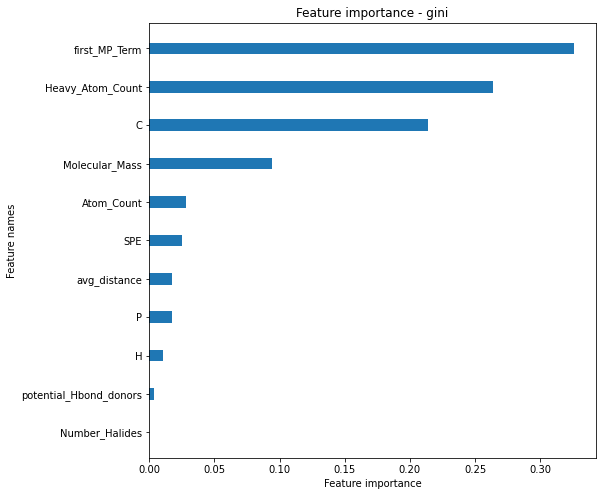

-----------------------------------
Param name / param value
-----------------------------------
bootstrap: True
cacheNodeIds: False
checkpointInterval: 10
featureSubsetStrategy: auto
featuresCol: features
impurity: variance
labelCol: Energy
leafCol: 
maxBins: 32
maxDepth: 5
maxMemoryInMB: 256
minInfoGain: 0.0
minInstancesPerNode: 1
minWeightFractionPerNode: 0.0
numTrees: 50
predictionCol: Predicted_Energy
seed: 104
subsamplingRate: 0.8


In [15]:
# we can use our previously defined function and RF object here.

RF3 = RandomForestRegressor(featuresCol="features",labelCol="Energy", predictionCol="Predicted_Energy",seed=104,
                           numTrees=50, subsamplingRate=0.8)
RF3_model, RF3_predictions, feature_cols = MLPipeline(RF3,feature_engineer3,seed=115)

RF3_feature_importance = RF3_model.stages[-1].featureImportances
# re-using our model summary function from earlier
model_summary(RF3_model,RF3_predictions,feature_cols,RF3_feature_importance)

#### some estimations seem reasonable, but the majority are miles off. Cleary our current approach isnt working.

## calculate coloumb matrix 

Clearly, our model is not performing all too well, atleast not compared to quantum mechanical methods. Here, we attempt to calculate a coloumb matrix for our features, a popular feature used for electronic strucure calculations. It creates a matrix that uses nuclear charges and relative distances to create a vectorized representation of molecular structure. Since we are dealing with molecules of different sized, we will pad our matrix with 0s to ensure all matrices are of the same size.

Since our estimaters can not use a matrix as a feature, we will flatten our 2d matrix to a 1d vector. i.e rather than having a matrix of shape $(Atoms_{maxLen},Atoms_{maxLen})$ we will have one of the shape $(Atoms_{maxLen}^{2},1)$

$$
C{IJ} = \frac{Z_I Z_J}{\vert R_I - R_J \vert}, \quad ({\rm I \neq J}) \qquad C{IJ} = Z_I^{2.4}, \quad (I=J)
$$

* $Cij$ : Coloumb term for the interaction between atom $i$, and $j$
* $Z_n$ : Nuclear charge of atom $n$
* $R_n$ : Position in space of atom $I$ as defined by its cartesian coordinates.


In [26]:
# max_atoms will be used to ensure all matrices created are of the same size. 
max_atoms = feature_engineer3.agg({"Atom_Count": "max"}).collect()[0][0]


def coulomb_calc(atoms,coords):
    '''Creates a flattened representation of the coloumb matrix of a given molecule. 
    
    '''
    global max_atoms, atomic_Z
    
    CIJ= np.zeros([max_atoms,max_atoms])
    
    for i in range(0,len(coords)):
        xi=coords[i][0]
        yi=coords[i][1]
        zi=coords[i][2]
        Z_i = [v for k,v in atomic_Z.items() if k==atoms[i]][0]
    
        for j in range(0,len(coords)):
            if i==j:
                CIJ[i][j] = 0.5 * Z_i**2.4
            else:
                xj=coords[j][0]
                yj=coords[j][1]
                zj=coords[j][2]
                Z_j = [v for k,v in atomic_Z.items() if k==atoms[j]][0]
                
                R_ij = math.sqrt((xi-xj)**2 + (yi-yj)**2 + (zi-zj)**2)
                CIJ[i][j] = Z_i * Z_j / R_ij
                
    CIJ_flat = CIJ.flatten()
          
    return DenseVector(CIJ_flat)
    
coulomb_calc_udf = udf(coulomb_calc,VectorUDT())
    
feature_engineer4 = feature_engineer3.select("*",vector_to_array(coulomb_calc_udf("Atoms","Atom_Coords")).alias("Coulomb_features"))


## Extracting Columb terms for use as features

If we look at the schema for our new dataframe, we should see that we have a new column that contains an array of features. Similar to the process we did at the start to extract atom types, we must extract the elements in these arrays. 

To do this, we will make use of list comprehensions as an efficent way of extracting, and naming these features. 

In [18]:
feature_engineer4.printSchema()

root
 |-- id: long (nullable = true)
 |-- Energy: double (nullable = true)
 |-- Atoms: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- Atom_Coords: array (nullable = true)
 |    |-- element: array (containsNull = true)
 |    |    |-- element: double (containsNull = true)
 |-- ShapeM: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- Atom_Count: long (nullable = false)
 |-- Heavy_Atom_Count: long (nullable = true)
 |-- Molecular_Mass: decimal(22,2) (nullable = true)
 |-- potential_Hbond_donors: long (nullable = true)
 |-- Number_Halides: long (nullable = true)
 |-- avg_distance: double (nullable = true)
 |-- SPE: double (nullable = true)
 |-- first_MP_Term: double (nullable = true)
 |-- H: integer (nullable = true)
 |-- C: integer (nullable = true)
 |-- P: integer (nullable = true)
 |-- Coulomb_features: array (nullable = false)
 |    |-- element: double (containsNull = false)



In [19]:
length_coulmb_vec = max_atoms**2

# extract features from coulomb_features
feature_engineer5 = feature_engineer4.select(["*"] + [col("Coulomb_features")[i].alias(f"coulomb_val_{i}") for i in range (0,length_coulmb_vec)])
# we have extracted all relevent features from coulomb_features, so we dont need this column anymore.
feature_engineer5 = feature_engineer5.drop("Coulomb_features").cache()


### Coulomb feature difficulties

Regretably, we were not able to create an estimater that could use the coulomb features, We succsefully created a dataframe that had max_atoms$^2$ coulomb feautures, we were able to vectorize this dataframe but when the resulting dataframe was supplied to an estimater through our MLPipeline spark context would eventually time out. We took a number of steps to try resolve this issue but to no evail.

### Steps taken to try and resolve the issues surrounding Coulomb features:

1) It was found that the issue lied within the estimater stage (stage 2) of our machine learning pipeline, it was thought that this could have been a memory issue, we were afterall trying to cache the dataframe. However, we tried running the pipeline when keeping on 1 of the ~14,000 features. Even then, the Estimater would never finish training on the dataset.

2) When creating our vectorised feature column we were getting a mix of sparse and dense vectors. This is functioning as it is suppose to, the vectorAssembler function identifes the most memory-efficent way of storing the data, as such you sometimes end up with a mix of sparse, and dense. Despite this, we thought the mix of vector types (that was not present in the earlier models) could have been the issue. We removed all sparse features (i.e those that contained majority 0s) to ensure all vectors created were dense. This did not fix the issue.

3) All previous attempts were done using the RandomForestRegressor estimater, we attempted to use other estimaters such as GBT, but we ran into the same issue of the spark context timing out.

After the above steps we accepted that this issue would not be resolved in time and as such continuted the project using our original feautures.

In [21]:
# due to limitations we will return to our feature_engineer 3 dataset. We will validate, and optimise it.
feature_engineer3.show()

+---+--------+--------------------+--------------------+--------------------+----------+----------------+--------------+----------------------+--------------+------------------+-------------------+-------------+---+---+---+
| id|  Energy|               Atoms|         Atom_Coords|              ShapeM|Atom_Count|Heavy_Atom_Count|Molecular_Mass|potential_Hbond_donors|Number_Halides|      avg_distance|                SPE|first_MP_Term|  H|  C|  P|
+---+--------+--------------------+--------------------+--------------------+----------+----------------+--------------+----------------------+--------------+------------------+-------------------+-------------+---+---+---+
|  1|  37.801|[O, O, O, O, N, C...|[[0.3387, 0.9262,...|[259.66, 4.28, 3....|        31|              14|        202.96|                     5|             0|  3.57176879538816|         -269.34354|       259.66| 17|  9|  0|
|  2| 44.1107|[O, O, O, O, N, C...|[[-0.3716, -0.903...|[259.66, 4.36, 2....|        32|              14

### Hyperopt

For parameter optimization we will be making use of the hyperopt package which provides an easy-to-use framework for hyperoptimization, it can be used on any model, in apache's sparks MLlib, or those found in other packages such as Sklearn or Keras. 

### Parrelization of non-parrelized algorithms
Hyperopt also supports parrelization, and in collebartion with Databricks produced a method for using it within the spark framework. So, as an example we could use the python implementation of XGboost, but ensure it 

The order of operation for hyperopt optimzation is as follows:

* You first must define a **parameter space** which is a dictonary that holds the paramter information, hyperopt provides some utilities for easy parameter expression, for example the *uniform* and *quniform* functions from *hyperopt.hp* can be used to generate uniformally distributed values that are either float values, or integers between two limits, which can be used for itterating through different values of a parameter that takes a numeric argument, *choice* can be used for a similar purpose but for string arguments. 



* Once a parameter space has been defined an **objective** function must be created, this is where the model its self is built, the only difference is; instead of defining parameters as absolute values, you make a call the paramater space dictonary and use the keys defined there. Any other calculations, or statistical tests that are wanting to be performed on each itteration of the model should also be included in the objective function. As an example, we will be performing k-fold cross validation on both of our models, and extracting cross_validation scores in the objective function. The objective function should return a dictonary that contains A) The loss function being used to determine the best set of parameters (In our case, its the mean cross validation score) and optionally the status, (hyperopt.STATUS_OK) which just provides a label that ensures only itterations there were succesful are used in the final results.

* Finally, hyperopt.fmin can be called. This hyperopt function brings together the parameter space dictonary, the user-defined objective, and several other parametrs such as number of itterations, algorithim to be used for searching through the paramter space, and if sparkTrials should be used.

NOTE: The use of sparkTrials allows the user to look at the results and inputs of individual itterations formulated by fmin, it also lets hyperopt know that you are running your program on a spark server in which case it will distribute its tasks asynchronously to **spark executers**. i.e you can use python-implemented models in a distributed fashion!

Since the algorithims we are using here are from MLlib, they are already distributed, and as such we will not need to use sparkTrials.




In [22]:
# #hyperopt.tpe produces some fairly irelevent log outputs, for this reason we will just remove them
# loggers_to_remove = [
#     "hyperopt.tpe"
# ]
# for logger in loggers_to_remove:
#     logging.getLogger(logger).setLevel(logging.ERROR)

In [23]:
def train_RF(data,subsamplingRate,maxBins,maxDepth,numTrees,seed):
    '''Function that trains a randomforest model, and validates it. This will be the model used in our  objective 
    function for hyperopt
    
    Params
    ------
    data: The data to be used for training and validating. It should already have its features vectorised. i.e by using
    a vector assembler.
    
    subsamplingRate: float value between 0, and 1. The proportion of data to be used for validation.
    
    maxBins: an integer value for the maximum number of bins to be used
    
    maxDepth: an integer value for the maximum tree depth
    
    numTrees: an integer value for the number of trees in the forest.
    
    '''
    
    RF_reg = RandomForestRegressor(featuresCol="features",
                                   labelCol="Energy",
                                   predictionCol="Predicted_Energy",
                                   subsamplingRate=subsamplingRate,
                                  maxBins=maxBins,
                                  maxDepth=maxDepth,
                                  numTrees=numTrees,
                                  seed=seed)
    
    model, model_pred, features = MLPipeline(RF_reg,data=data)
    
    evaluator = RegressionEvaluator(labelCol="Energy",predictionCol="Predicted_Energy")
    
    validation_metric = evaluator.evaluate(model_pred)
    
    return model, validation_metric


def hyperopt_objective_RF(space):
    
    subsamplingRate = space["subsamplingRate"]
    maxBins = space["maxBins"]
    maxDepth = space["maxDepth"]
    numTrees = space["numTrees"]

    model, rmse = train_RF(feature_engineer3,subsamplingRate,maxBins,maxDepth,numTrees,123)
    
    loss = rmse
    
    return {"loss":loss, "status":STATUS_OK}


space = {"subsamplingRate": hp.uniform("subsamplingRate",0.75,1),
        "maxBins":hp.choice("maxBins",np.arange(6,32,dtype=int)),
        "maxDepth": hp.choice("maxDepth",np.arange(2,6,dtype=int)),
         "numTrees": hp.choice("numTrees",np.arange(10,50,dtype=int)),
    
        }


best_params = fmin(
    fn=hyperopt_objective_RF,
    space=space,
    algo=tpe.suggest,
    max_evals=25
  )
    
    

100%|██████████| 25/25 [11:11<00:00, 26.87s/trial, best loss: 17.810660991498317]


In [24]:
def train_GBT(data,minInstancesPerNode, maxBins,stepSize ,seed):
    
    GBT_reg = GBTRegressor(featuresCol="features",
                                   labelCol="Energy",
                                   predictionCol="Predicted_Energy",
                           maxBins=maxBins,
                           minInstancesPerNode=minInstancesPerNode,
                           stepSize=stepSize,
                           seed=seed
                           
                          )
    
    model, model_pred, features = MLPipeline(GBT_reg,data=data)
    
    evaluator = RegressionEvaluator(labelCol="Energy",predictionCol="Predicted_Energy")
    
    validation_metric = evaluator.evaluate(model_pred)
    
    return model, validation_metric


def hyperopt_objective_GBT(space):
    
    maxBins = space["maxBins"]
    minInstancesPerNode = space["minInstancesPerNode"]
    stepSize = space["stepSize"]

    model, rmse = train_GBT(feature_engineer3,minInstancesPerNode,maxBins,stepSize,123)
    
    loss = rmse
    
    return {"loss":loss, "status":STATUS_OK}


space = {"stepSize": hp.uniform("stepSize",0.1,0.3),
        "maxBins":hp.choice("maxBins",np.arange(6,32,dtype=int)),
        "minInstancesPerNode": hp.choice("minInstancesPerNode",np.arange(2,8,dtype=int)),
    
        }


best_params = fmin(
    fn=hyperopt_objective_GBT,
    space=space,
    algo=tpe.suggest,
    max_evals=10
  )
    
    

100%|██████████| 10/10 [20:10<00:00, 121.07s/trial, best loss: 15.800902030235118]


Overall, the GBT model out-performed the randomforest by a significant amount, with the GBT reaching RMSE of 15.8, as compared to the randomforest's 17.8. The random forest was ~5x faster to train than the GBT, however and as such offers better scalability.

In [32]:
print(f"Best parameters for GBT:\n\n{best_params}")

Best parameters for GBT:

{'maxBins': 18, 'minInstancesPerNode': 4, 'stepSize': 0.28290464379061825}


### References 

1. M. Schlander et al, 2021, 'How Much Does It Cost to Research and Develop a New Drug? A Systematic Review and Assessment', *PharmacoEconomics*, **39**, 1243-1269.
2. A. L. Hickey et al 2014, 'Benchmarking Quantum Chemical Methods for the Calculation of Molecular Dipole Moments and Polarizabilities', *J. Phys. Chem. A*,  **20**, 3678-3687.
3. J. L. Reymond, 2010, 'Chemical space as a source for new drugs', *Med. Chem. Comm*, **1**, 30-38. 
4. T. Fink et al, 2005, 'Virtual exploration of the small-molecule chemical universe below 160 daltons', *Angew. Chem. Int. Ed*, **44**, 1504-1508.
5. O. A. Arodola et al, 2017, 'Quantum mechanics implementation in drug-design workflows: does it really help?', *Drug. Des. Devel. Ther*, **11**, 2551-2564.
6. J. Vamathevan et al, 2019, 'Applications of machine learning in drug discovery and development', *Nat. Rev. Drug Discov.*, **18**, 463-477.
7. L. Patel et al, 2020, 'Machine Learning Methods in Drug Discovery', *Molecules*, **25**, 5277.
8. S. Ekins et al, 2019, 'Exploiting machine learning for end-to-end drug discovery and development', *Nat. Mater.*, **18**, 435-441.